In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from statsmodels.api import OLS
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
## Reading in Wine CSV
from google.colab import drive 
drive.mount('/content/drive/')
#!pwd
#!ls "/content/drive/My Drive"

import os
os.chdir('/content/drive/My Drive/DS3010 Project')

df_red = pd.read_csv('winequality-red.csv')
df_white = pd.read_csv('winequality-white.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
## Drop unnecessary values
df_red = df_red.dropna() #drop missing rows
df_white = df_white.dropna() #drop missing rows

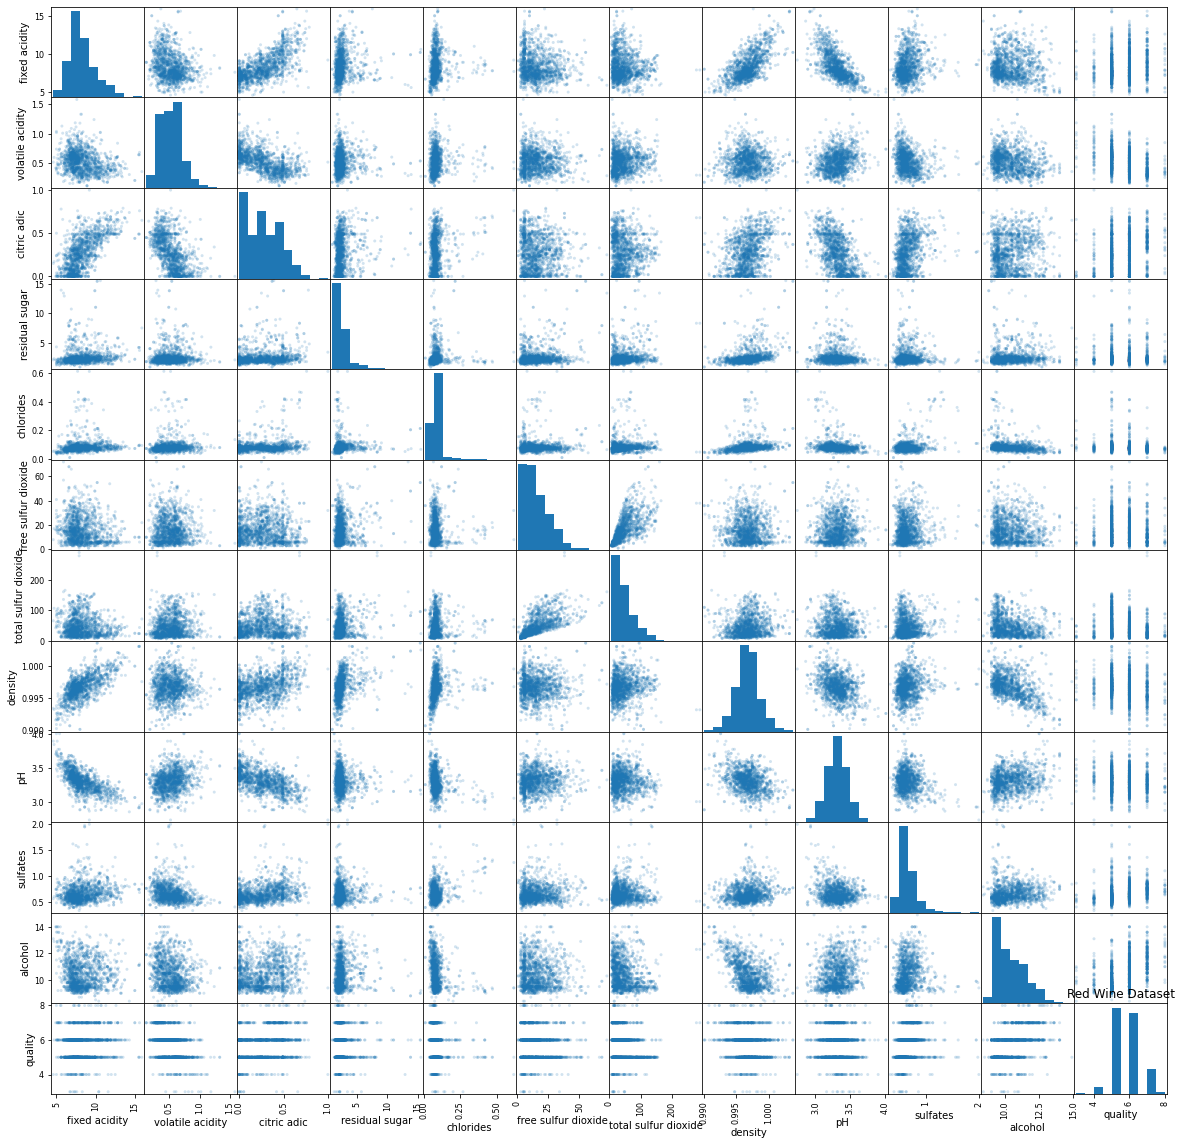

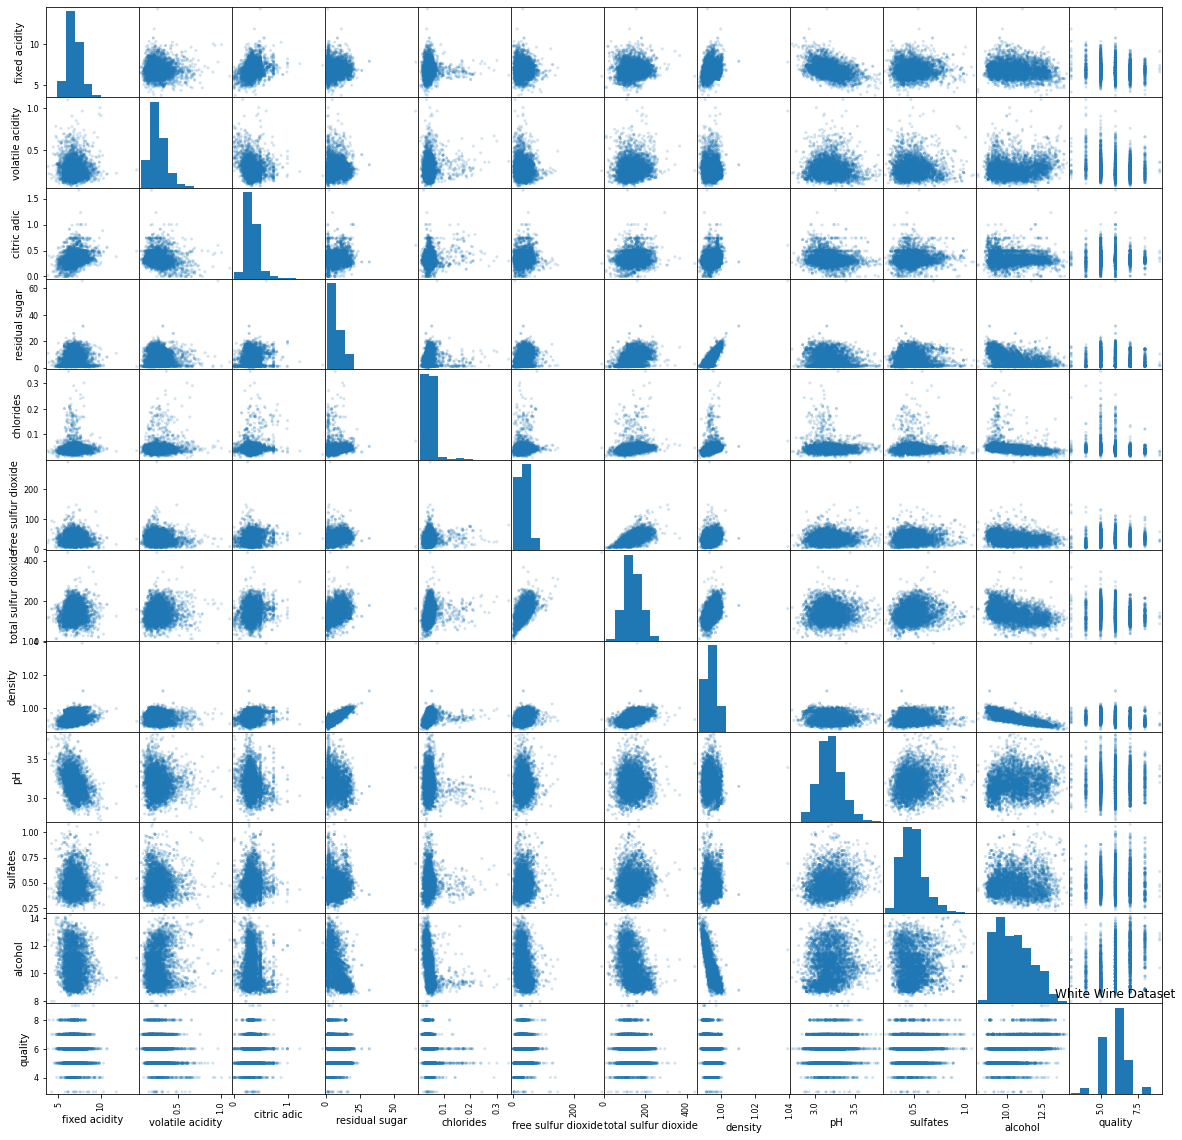

In [4]:
pd.plotting.scatter_matrix(df_red,alpha=0.2,figsize=(20,20))
plt.title('Red Wine Dataset')
plt.show()

pd.plotting.scatter_matrix(df_white,alpha=0.2,figsize=(20,20))
plt.title('White Wine Dataset')
plt.show()

In [ ]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric adic             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide       int64
total sulfur dioxide      int64
density                 float64
pH                      float64
sulfates                float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric adic             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulfates                float64
alcohol                 float64
quality                   int64
dtype: object

In [ ]:
df_red.describe()

,fixed acidity,volatile acidity,citric adic,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df_white.describe()

,fixed acidity,volatile acidity,citric adic,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df_red.corr()

,fixed acidity,volatile acidity,citric adic,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153791,-0.113198,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010487,0.076479,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric adic,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060885,0.035506,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187310,0.203048,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005627,0.047402,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153791,-0.010487,-0.060885,0.187310,0.005627,1.000000,0.668025,-0.021981,0.070288,0.051606,-0.069346,-0.050554
total sulfur dioxide,-0.113198,0.076479,0.035506,0.203048,0.047402,0.668025,1.000000,0.071256,-0.066507,0.042923,-0.205667,-0.185112
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021981,0.071256,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070288,-0.066507,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulfates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051606,0.042923,0.148506,-0.196648,1.000000,0.093595,0.251397


In [ ]:
df_white.corr()

,fixed acidity,volatile acidity,citric adic,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulfates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric adic,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulfates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.utils import resample
import itertools
from time import perf_counter
from sklearn.decomposition import PCA

## Bootstrap the data
df_red_boot = resample(df_red, replace=True, n_samples=4, random_state=1)
df_white_boot = resample(df_white, replace=True, n_samples=4, random_state=1)

In [138]:
## Red wine Linear Regression

## Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y= df_red_boot.quality

## Split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Running Linear Regression
lin_reg = LinearRegression().fit(X_train,y_train)

# Predicting based on testing data
Y_pred = lin_reg.predict(X_test)

## Printing MSE
print('Mean Squared Error for Linear Regression with PCA = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Linear Regression with PCA =  0.006290860756553375
Elapsed time during the whole program in seconds: 0.015441819999978179


In [140]:
print(X.columns)

Index(['fixed acidity', 'volatile acidity', 'citric adic', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulfates', 'alcohol'],
      dtype='object')


In [7]:
## Red wine Linear Regression with PCA
# Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y= df_red_boot.quality

# Projecting from 13 dimensions to 2 dimensions
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
print(pca.explained_variance_ratio_) # Shows this is not containing much of the information 

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run Linear Regression model
lin_reg = LinearRegression().fit(X_train,y_train)

# Predicting based on testing data
Y_pred = lin_reg.predict(X_test)

## Printing MSE
print('Mean Squared Error for Linear Regression with PCA = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
#print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

[0.99482452 0.00357161]
Mean Squared Error for Linear Regression with PCA =  154.65915976612715
Elapsed time during the whole program in seconds: 0.013947172999905888


In [147]:
## White wine Linear Regression
## Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y= df_white_boot.quality

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run linear regression model
lin_reg = LinearRegression().fit(X_train,y_train)

# Predicting based on testing data
Y_pred = lin_reg.predict(X_test)

## Printing MSE
print('Mean Squared Error for Linear Regression = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter() 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Linear Regression =  3.047246393605647
Elapsed time during the whole program in seconds: 0.012342662000264681


In [9]:
## White wine Linear Regression with PCA
# Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y= df_white_boot.quality

# Projecting from 13 dimensions to 2 dimensions
pca = PCA(n_components=2).fit(X)
X = pca.transform(X)
print(pca.explained_variance_ratio_) # Shows this is not containing much of the information 

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run linear regression model
lin_reg = LinearRegression().fit(X_train,y_train)

# Predicting based on testing data
Y_pred = lin_reg.predict(X_test)

## Printing MSE
print('Mean Squared Error for Linear Regression with PCA = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

[0.90226297 0.09749757]
Mean Squared Error for Linear Regression with PCA =  3.0482891189168075
Elapsed time during the whole program in seconds: 0.005749431000026561


In [141]:
## Best Subset Selection for Red Wine

import statsmodels.api as sm
import time

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y= df_red_boot.quality
y=Y

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_best = pd.DataFrame(columns=["RSS", "model"])

for i in range(1,8):
    models_best.loc[i] = getBest(i)

#print(models_best)
print(models_best.loc[2, "model"].summary())

Processed 11 models on 1 predictors in 0.03424072265625 seconds.
Processed 55 models on 2 predictors in 0.1400465965270996 seconds.
Processed 165 models on 3 predictors in 0.4090578556060791 seconds.
Processed 330 models on 4 predictors in 0.8356313705444336 seconds.
Processed 462 models on 5 predictors in 1.186061143875122 seconds.
Processed 462 models on 6 predictors in 1.3106498718261719 seconds.
Processed 330 models on 7 predictors in 0.9116885662078857 seconds.
                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              800.7
Date:                Wed, 05 May 2021   Prob (F-statistic):                     0.00125
Time:                        16:13:31   Log-Likelihood:                         0.30757
N

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


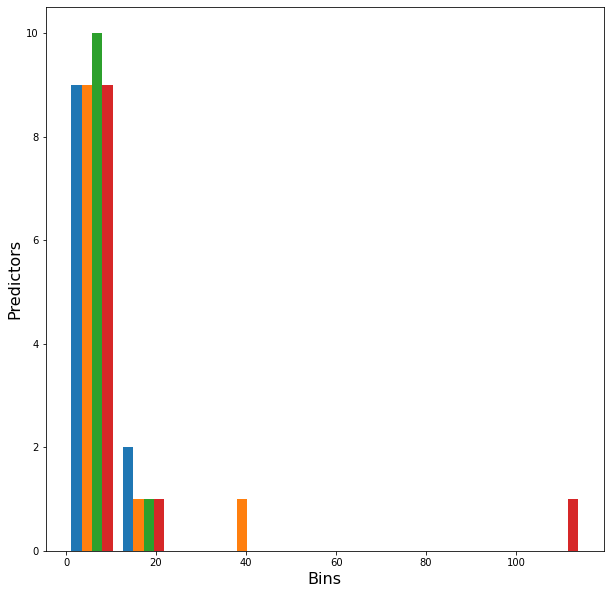

In [144]:
plt.figure(figsize=(10, 10))
plt.hist(X)
plt.xlabel('Bins',fontsize=16)
plt.ylabel('Predictors',fontsize=16)
plt.show()

In [105]:
## Linear Regression with Best Predictors - Red Wine
## Define new X and Y
X = df_red_boot[['fixed acidity','total sulfur dioxide']]
Y = df_red_boot[['quality']]

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run linear regression
lin_reg_bss = LinearRegression().fit(X_train,y_train)
Y_pred_bss = lin_reg_bss.predict(X_test)

## Print MSE
print('Mean Squared Error for Linear Regression with Best Predictors = ',mean_squared_error(y_test, Y_pred_bss))

Mean Squared Error for Linear Regression with Best Predictors =  0.7086405566727345


In [145]:
## Best Subset Selection for White Wine

import statsmodels.api as sm
import time

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y= df_white_boot.quality
y=Y

def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

models_best = pd.DataFrame(columns=["RSS", "model"])

for i in range(1,8):
    models_best.loc[i] = getBest(i)

#print(models_best)
print(models_best.loc[2, "model"].summary())

Processed 11 models on 1 predictors in 0.0405428409576416 seconds.
Processed 55 models on 2 predictors in 0.13180899620056152 seconds.
Processed 165 models on 3 predictors in 0.38108134269714355 seconds.
Processed 330 models on 4 predictors in 0.7487101554870605 seconds.
Processed 462 models on 5 predictors in 1.0699174404144287 seconds.
Processed 462 models on 6 predictors in 1.072643518447876 seconds.
Processed 330 models on 7 predictors in 0.9242475032806396 seconds.
                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              6306.
Date:                Wed, 05 May 2021   Prob (F-statistic):                    0.000159
Time:                        16:17:12   Log-Likelihood:                          5.14

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


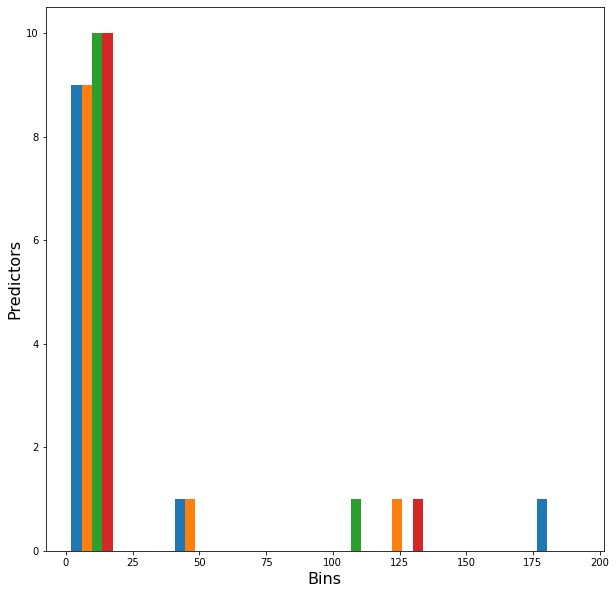

In [146]:
plt.figure(figsize=(10, 10))
plt.hist(X)
plt.xlabel('Bins',fontsize=16)
plt.ylabel('Predictors',fontsize=16)
plt.show()

In [109]:
## Linear Regression with Best Predictors - White Wine
## Define new X and Y
X = df_white_boot[['volatile acidity','total sulfur dioxide']]
Y = df_white_boot[['quality']]

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run linear regression model
lin_reg_bss = LinearRegression().fit(X_train,y_train)
Y_pred_bss = lin_reg_bss.predict(X_test)

## Print MSE
print('Mean Squared Error for Linear Regression with Best Predictors = ',mean_squared_error(y_test, Y_pred_bss))

Mean Squared Error for Linear Regression with Best Predictors =  0.030563841752653937


In [61]:
## SVR for Red Wine

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

## Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y= df_red_boot.quality

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run SVR with varying kernels
linear_svr = SVR(kernel='linear').fit(X_train, y_train)
rbf_svr = SVR(kernel='rbf').fit(X_train, y_train)
poly_svr = SVR(kernel='poly').fit(X_train, y_train)

# Predicting based on testing data
Y_pred_lin = linear_svr.predict(X_test)
Y_pred_rbf = rbf_svr.predict(X_test)
Y_pred_poly = poly_svr.predict(X_test)

## Printing MSE=
print('Mean Squared Error for SVR with Linear Kernel = ',mean_squared_error(y_test, Y_pred_lin))
print('Mean Squared Error for SVR with RBF Kernel = ',mean_squared_error(y_test, Y_pred_rbf))
print('Mean Squared Error for SVR with Poly Kernel = ',mean_squared_error(y_test, Y_pred_poly))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)


Mean Squared Error for SVR with Linear Kernel =  0.3584199162176438
Mean Squared Error for SVR with RBF Kernel =  1.3108076747956607
Mean Squared Error for SVR with Poly Kernel =  28.559423923278846
Elapsed time during the whole program in seconds: 0.010154605000025185


In [110]:
## SVR for White Wine

from sklearn.svm import SVR
from sklearn.svm import LinearSVR

## Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y= df_white_boot.quality

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run SVR for varying kernels
linear_svr = SVR(kernel='linear').fit(X_train, y_train)
rbf_svr = SVR(kernel='rbf').fit(X_train, y_train)
poly_svr = SVR(kernel='poly').fit(X_train, y_train)

# Predicting based on testing data
Y_pred_lin = linear_svr.predict(X_test)
Y_pred_rbf = rbf_svr.predict(X_test)
Y_pred_poly = poly_svr.predict(X_test)

## Printing MSE
print('Mean Squared Error for SVR with Linear Kernel = ',mean_squared_error(y_test, Y_pred_lin))
print('Mean Squared Error for SVR with RBF Kernel = ',mean_squared_error(y_test, Y_pred_rbf))
print('Mean Squared Error for SVR with Poly Kernel = ',mean_squared_error(y_test, Y_pred_poly))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for SVR with Linear Kernel =  2.766483254251397
Mean Squared Error for SVR with RBF Kernel =  1.7319948512271803
Mean Squared Error for SVR with Poly Kernel =  3.0514895232629398
Elapsed time during the whole program in seconds: 0.01384422099999938


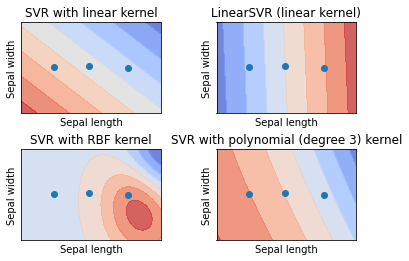

In [114]:
h = .02  # step size in the mesh
X = df_red_boot.drop('quality',axis=1)
X = X.iloc[:,:2]
Y= df_red_boot.quality
y=Y
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svr = SVR(kernel='linear', C=C).fit(X,y)
rbf_svr = SVR(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svr = SVR(kernel='poly', degree=3, C=C).fit(X, y)
lin_svr = LinearSVR(C=C).fit(X, y)

X = X_train.iloc[:,:2]
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVR with linear kernel',
          'LinearSVR (linear kernel)',
          'SVR with RBF kernel',
          'SVR with polynomial (degree 3) kernel']

for i, clf in enumerate((svr, lin_svr, rbf_svr, poly_svr)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

In [115]:
## Random Forest Regression for Red Wine

from sklearn.ensemble import RandomForestRegressor
# Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y = df_red_boot.quality

## Split in to testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run random forest model
ranfor = RandomForestRegressor(random_state=1).fit(X_train,y_train)

Y_pred = ranfor.predict(X_test)

## Printing MSE
print('Mean Squared Error for Random Forest = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Random Forest =  1.7424000000000008
Elapsed time during the whole program in seconds: 0.12863990599998942


In [116]:
## Random Forest Regression for White Wine

from sklearn.ensemble import RandomForestRegressor
# Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y = df_white_boot.quality

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

ranfor = RandomForestRegressor(random_state=1).fit(X_train,y_train)

Y_pred = ranfor.predict(X_test)

## Printing MSE and RMSE
print('Mean Squared Error for Random Forest = ',mean_squared_error(y_test, Y_pred))
#print('Root Mean QuAnp.sqrt(mean_squared_error(y_test,Y_pred)))

## Print computation time
t1_stop = perf_counter()
#print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Random Forest =  1.2321000000000006
Elapsed time during the whole program in seconds: 0.13024043800032814


In [117]:
## Decision Tree Regression for Red Wine 
from sklearn.tree import DecisionTreeRegressor
# Begin timer

t1_start = perf_counter()

## Defined X and Y
X = df_red_boot.drop('quality',axis=1)
Y = df_red_boot.quality

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run decision tree model
dec_regr = DecisionTreeRegressor(criterion='mse',random_state=1).fit(X_train,y_train)

# Predicting based on testing data
Y_pred = dec_regr.predict(X_test)

## Printing MSE
print('Mean Squared Error for Decision Tree = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Decision Tree =  1.0
Elapsed time during the whole program in seconds: 0.01062078399991151


In [118]:
## Decision Tree Regression for White Wine

from sklearn.tree import DecisionTreeRegressor
# Begin timer

t1_start = perf_counter()

## Defined X and Y
X = df_white_boot.drop('quality',axis=1)
Y = df_white_boot.quality

## Split into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Run decusion tree model
dec_regr = DecisionTreeRegressor(criterion='mse',random_state=1).fit(X_train,y_train)

# Predicting based on testing data
Y_pred = dec_regr.predict(X_test)

## Printing MSE
print('Mean Squared Error for Decision Tree = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Decision Tree =  1.0
Elapsed time during the whole program in seconds: 0.005256403000203136


In [148]:
## Final test for Red Wine with Linear Regression
## Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_red.drop('quality',axis=1)
Y= df_red.quality

## Split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

## Running Linear Regression
lin_reg = LinearRegression().fit(X_train,y_train)

# Predicting based on testing data
Y_pred = lin_reg.predict(X_test)

## Printing MSE
print('Mean Squared Error for Linear Regression with PCA = ',mean_squared_error(y_test, Y_pred))

## Print computation time
t1_stop = perf_counter()
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Linear Regression with PCA =  0.38657415063443507
Elapsed time during the whole program in seconds: 0.01165592200050014


In [150]:
## Final test for White Wine with Random Forest

from sklearn.ensemble import RandomForestRegressor
# Begin timer
t1_start = perf_counter()

## Defined X and Y
X = df_white.drop('quality',axis=1)
Y = df_white.quality

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25,random_state=1)

ranfor = RandomForestRegressor(random_state=1).fit(X_train,y_train)

Y_pred = ranfor.predict(X_test)

## Printing MSE and RMSE
print('Mean Squared Error for Random Forest = ',mean_squared_error(y_test, Y_pred))
#print('Root Mean QuAnp.sqrt(mean_squared_error(y_test,Y_pred)))

## Print computation time
t1_stop = perf_counter()
#print("Elapsed time:", t1_stop, t1_start) 
print("Elapsed time during the whole program in seconds:",
                                        t1_stop-t1_start)

Mean Squared Error for Random Forest =  0.3505488979591837
Elapsed time during the whole program in seconds: 2.290018092999162
